In [1]:
'''import'''
import pandas as pd
import json
import os
import csv
import numpy as np # linear algebra
import seaborn as sns

%matplotlib inline 
 
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [2]:
cur_file = os.path.join('data', 'seoul-metro-logs-raw-2020.csv')  

# 데이터 파일 로드
df = pd.read_csv(cur_file, encoding='utf-8')
df.head()
    

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25
1,2020-01-01,1호선,150,서울역,하차,235,952,828,1043,1694,...,2286,2354,2261,1922,1696,1620,1181,768,426,77
2,2020-01-01,1호선,151,시청,승차,105,118,123,206,318,...,873,1019,1234,1383,1271,1061,991,572,217,2
3,2020-01-01,1호선,151,시청,하차,81,223,334,570,611,...,885,783,849,602,435,293,273,174,149,26
4,2020-01-01,1호선,152,종각,승차,798,366,198,236,310,...,1636,1748,1890,1879,1827,1955,1800,1259,406,6


In [3]:
# 서울역 (역번호 150)의 승차 인원만 필터링
df = df[(df['역번호'] == 150) & (df['구분'] == '승차')]
df.head()

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,15:00 ~ 16:00,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,2972,3194,3342,3002,2857,2311,2523,1830,987,25
550,2020-01-02,1호선,150,서울역,승차,351,492,1774,3508,2104,...,3675,3715,5874,10382,4630,3206,3054,1962,1064,147
1100,2020-01-03,1호선,150,서울역,승차,366,463,1445,2876,2138,...,4122,4732,7182,11119,5584,3807,3632,2877,1370,166
1650,2020-01-04,1호선,150,서울역,승차,363,321,586,1310,1776,...,4384,4416,3998,3160,2820,2328,2393,2184,848,5
2202,2020-01-05,1호선,150,서울역,승차,221,305,354,816,1188,...,3289,3085,3484,3072,2843,2367,2510,2209,820,3


In [4]:
# 하루 총 승차인원의 합계를 구하여 total 컬럼에 입력
df['total'] = df.sum(axis=1)
df.head()

,날짜,호선,역번호,역명,구분,06:00 이전,06:00 ~ 07:00,07:00 ~ 08:00,08:00 ~ 09:00,09:00 ~ 10:00,...,16:00 ~ 17:00,17:00 ~ 18:00,18:00 ~ 19:00,19:00 ~ 20:00,20:00 ~ 21:00,21:00 ~ 22:00,22:00 ~ 23:00,23:00 ~ 24:00,24:00 이후,total
0,2020-01-01,1호선,150,서울역,승차,356,280,313,774,923,...,3194,3342,3002,2857,2311,2523,1830,987,25,36791
550,2020-01-02,1호선,150,서울역,승차,351,492,1774,3508,2104,...,3715,5874,10382,4630,3206,3054,1962,1064,147,59868
1100,2020-01-03,1호선,150,서울역,승차,366,463,1445,2876,2138,...,4732,7182,11119,5584,3807,3632,2877,1370,166,66407
1650,2020-01-04,1호선,150,서울역,승차,363,321,586,1310,1776,...,4416,3998,3160,2820,2328,2393,2184,848,5,48708
2202,2020-01-05,1호선,150,서울역,승차,221,305,354,816,1188,...,3085,3484,3072,2843,2367,2510,2209,820,3,38539


In [5]:
# 최종 데이터 확인
df = df[['날짜', 'total']]
df.head()

,날짜,total
0,2020-01-01,36791
550,2020-01-02,59868
1100,2020-01-03,66407
1650,2020-01-04,48708
2202,2020-01-05,38539


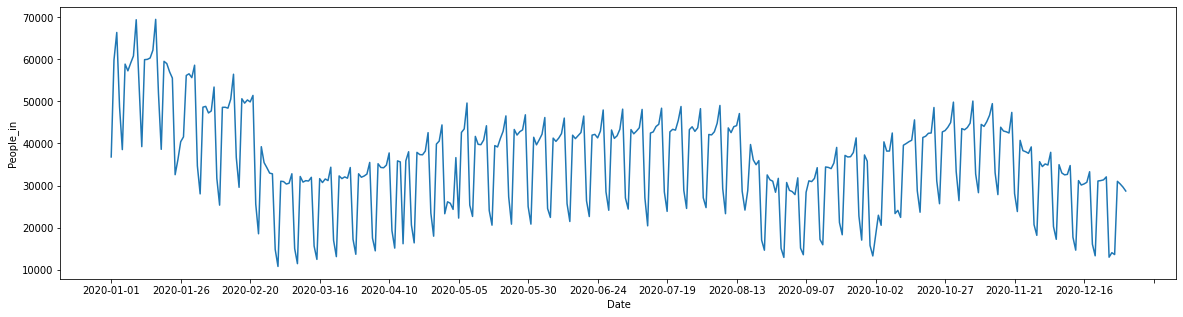

<Figure size 1440x576 with 0 Axes>

In [6]:
# 데이터 그래프로 나타내기
xs = df['날짜'].to_list()
ys = df['total'].to_list()

fig, axes=plt.subplots(figsize=(20, 5))

axes.plot(xs, ys)
axes.xaxis.set_major_locator(MaxNLocator(20)) 
axes.set_xlabel("Date")
axes.set_ylabel("People_in")

plt.figure(figsize=(20,8))
plt.show()


In [7]:
# 데이터 스케일링
from sklearn.preprocessing import MinMaxScaler

df.sort_index(ascending=False).reset_index(drop=True)
scaler = MinMaxScaler()

df_scaled = scaler.fit_transform(df[['total']])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['total']

df_scaled

,total
0,0.443104
1,0.835684
2,0.946923
3,0.645833
4,0.472841
...,...
361,0.048109
362,0.344470
363,0.333753
364,0.321164


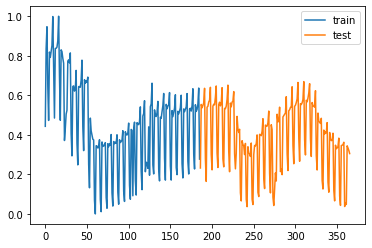

In [13]:
from sklearn.model_selection import train_test_split

# 학습/검증 데이터 생성 메소드
def make_dataset(data, label, window_size=10):
    feature_list = []
    label_list = []
    
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size])) # 윈도우 사이즈만큼을 feature로
        label_list.append(np.array(label.iloc[i+window_size])) # 바로 다음 값을 레이블로 설정
    return np.array(feature_list), np.array(label_list)

# 7일간의 데이터로 다음 날 값을 예측
WINDOW_SIZE = 7
# 6개월 학습, 6개월 테스트
TEST_SIZE = 180

# 전체 데이터에서 테스트 데이터를 제외한 것을 학습으로 사용
train = df_scaled[:-TEST_SIZE]
# 나머지를 테스트
test = df_scaled[-TEST_SIZE:]



ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [8]:
# 해당 일자의 총 승차인원을 feature로 설정 (feature는 여러 개가 될 수 있음)
feature_cols = ['total']
label_cols = ['total']

train_feature = train[feature_cols]
train_label = train[label_cols]

# 학습용 데이터셋 생성
train_feature, train_label = make_dataset(train_feature, train_label, WINDOW_SIZE)

# 학습용 데이터 일부를 사용하여 검증용 데이터셋 생성
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
# 학습 데이터 shape 확인 ([# of samples, # of time steps, # of features])
x_train.shape, x_valid.shape 

((143, 7, 1), (36, 7, 1))

In [9]:
test_feature = test[feature_cols]
test_label = test[label_cols]

test_feature, test_label = make_dataset(test_feature, test_label, WINDOW_SIZE)
# 데스트 데이터 shape 확인
test_feature.shape, test_label.shape

((173, 7, 1), (173, 1))

In [15]:
# 모델 구축

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM, Bidirectional

model = Sequential()
model.add(InputLayer(input_shape=(train_feature.shape[1], train_feature.shape[2])))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dense(1))


print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 128)               33792     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 33,921
Trainable params: 33,921
Non-trainable params: 0
_________________________________________________________________
None


In [134]:
import os

model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=5)

model_path = 'model'
filename = os.path.join(model_path, 'tmp_checkpoint.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# 모델 학습
history = model.fit(x_train, y_train, 
                                    epochs=100, 
                                    batch_size=32,
                                    validation_data=(x_valid, y_valid), 
                                    callbacks=[early_stop, checkpoint])

Epoch 1/100
5/5 [==============================] - 2s 91ms/step - loss: 0.0223 - val_loss: 0.0205

Epoch 00001: val_loss improved from inf to 0.02052, saving model to model\tmp_checkpoint.h5
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0224 - val_loss: 0.0211

Epoch 00002: val_loss did not improve from 0.02052
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0211 - val_loss: 0.0196

Epoch 00003: val_loss improved from 0.02052 to 0.01955, saving model to model\tmp_checkpoint.h5
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0202 - val_loss: 0.0189

Epoch 00004: val_loss improved from 0.01955 to 0.01895, saving model to model\tmp_checkpoint.h5
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0199 - val_loss: 0.0184

Epoch 00005: val_loss improved from 0.01895 to 0.01840, saving model to model\tmp_checkpoint.h5
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0197 

In [135]:
model.load_weights(filename)
pred = model.predict(test_feature)

# 예측 값 shape 확인 (테스트 데이터 feature, 1개의 예측 값)
pred.shape

(173, 1)

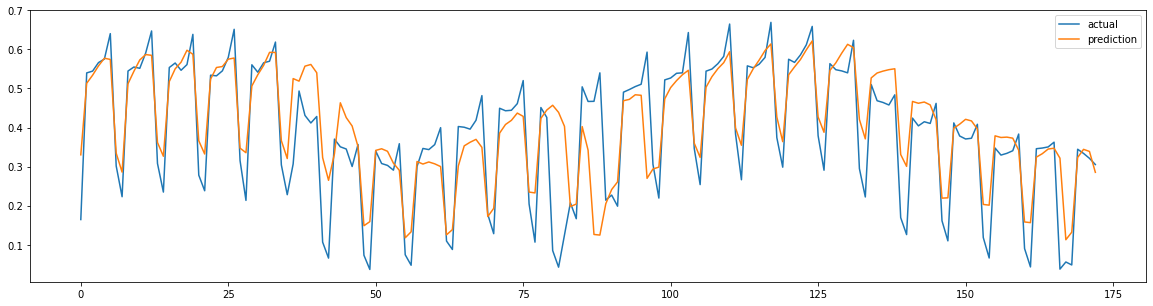

In [136]:
# 예측 값과 실제 값 확인

plt.figure(figsize=(20, 5))
plt.plot(test_label, label = 'actual')
plt.plot(pred, label = 'prediction')
plt.legend()
plt.show()